In [2]:
import pandas as pd
import numpy as np
import snoop
from pprint import pprint as print
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use("seaborn-whitegrid")
pd.set_option("display.width", 5000)
pd.set_option("display.max_columns", 60)
plt.rcParams["figure.figsize"] = (15, 10)

%load_ext snoop
%config InlineBackend.figure_format = 'retina'
# %config InlineBackend.figure_format = 'svg' 
# show all output not only the last result
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

The snoop extension is already loaded. To reload it, use:
  %reload_ext snoop


In [4]:
import dataframe_image as dfi


In [19]:
df = pd.read_excel("dataframe_lamoda.xlsm")
df.columns = [i.lower() for i in df.columns]
df.drop("delivery date", axis=1, inplace=True)
t = df.groupby("postcode").sum()
t["mean_val"] = t["value_delivered"] / t["orders_shipped"]
t = t.reset_index()

t["returns"] = t["value_shipped"] - t["value_delivered"]
t = t.sort_values(by=["mean_val"], ascending=False).set_index("postcode")

t["delivered_percent"] = t["orders_delivered"] / (t["orders_shipped"])
''' dfi.export(
    t.sort_values(["delivered_percent", "value_delivered"], ascending=False),
    "im.png") '''


' dfi.export(\n    t.sort_values(["delivered_percent", "value_delivered"], ascending=False),\n    "im.png") '

In [75]:
# t = t.reset_index()
t.round(2)

,postcode,orders_shipped,orders_delivered,value_shipped,value_delivered,mean_val,returns,delivered_percent,avg_return
0,111114,21,12,145570.82,115564.68,5503.08,30006.14,0.57,3334.02
1,111115,204,178,921418.31,837113.47,4103.50,84304.85,0.87,3242.49
2,111113,53,45,316907.84,203363.67,3837.05,113544.17,0.85,14193.02
3,111116,16,7,64936.67,35216.67,2201.04,29720.00,0.44,3302.22
4,111111,117,86,755560.53,217618.83,1859.99,537941.71,0.74,17352.96
5,111112,22,16,75370.85,32235.13,1465.23,43135.72,0.73,7189.29


In [22]:
# t = t.reset_index()
# fig, ax = plt.subplots()

# axins = inset_axes(ax, "30%", "40%", loc="upper right", borderpad=3)
# sns.catplot(x='postcode',
#             y='returns',
#             data=t,
#             kind='bar',
#             ax=axins,
#             truncate=True)
# plt.show()

In [78]:
t['avg_return'] = t['returns'] / (t['orders_shipped'] - t['orders_delivered'])
t = t.round(2)
t

,postcode,orders_shipped,orders_delivered,value_shipped,value_delivered,mean_val,returns,delivered_percent,avg_return
0,111114,21,12,145570.82,115564.68,5503.08,30006.14,0.57,3334.02
1,111115,204,178,921418.31,837113.47,4103.50,84304.85,0.87,3242.49
2,111113,53,45,316907.84,203363.67,3837.05,113544.17,0.85,14193.02
3,111116,16,7,64936.67,35216.67,2201.04,29720.00,0.44,3302.22
4,111111,117,86,755560.53,217618.83,1859.99,537941.71,0.74,17352.96
5,111112,22,16,75370.85,32235.13,1465.23,43135.72,0.73,7189.29


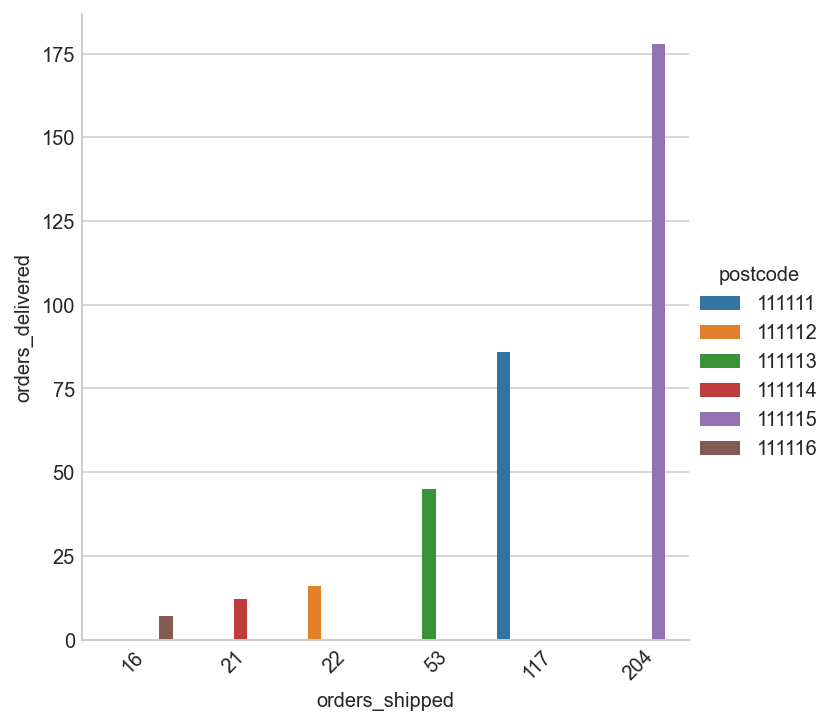

In [85]:
g = sns.catplot(x='orders_shipped',
                y='orders_delivered',
                hue='postcode',
                data=t,
                kind='bar')
g.set_xticklabels(rotation=45)


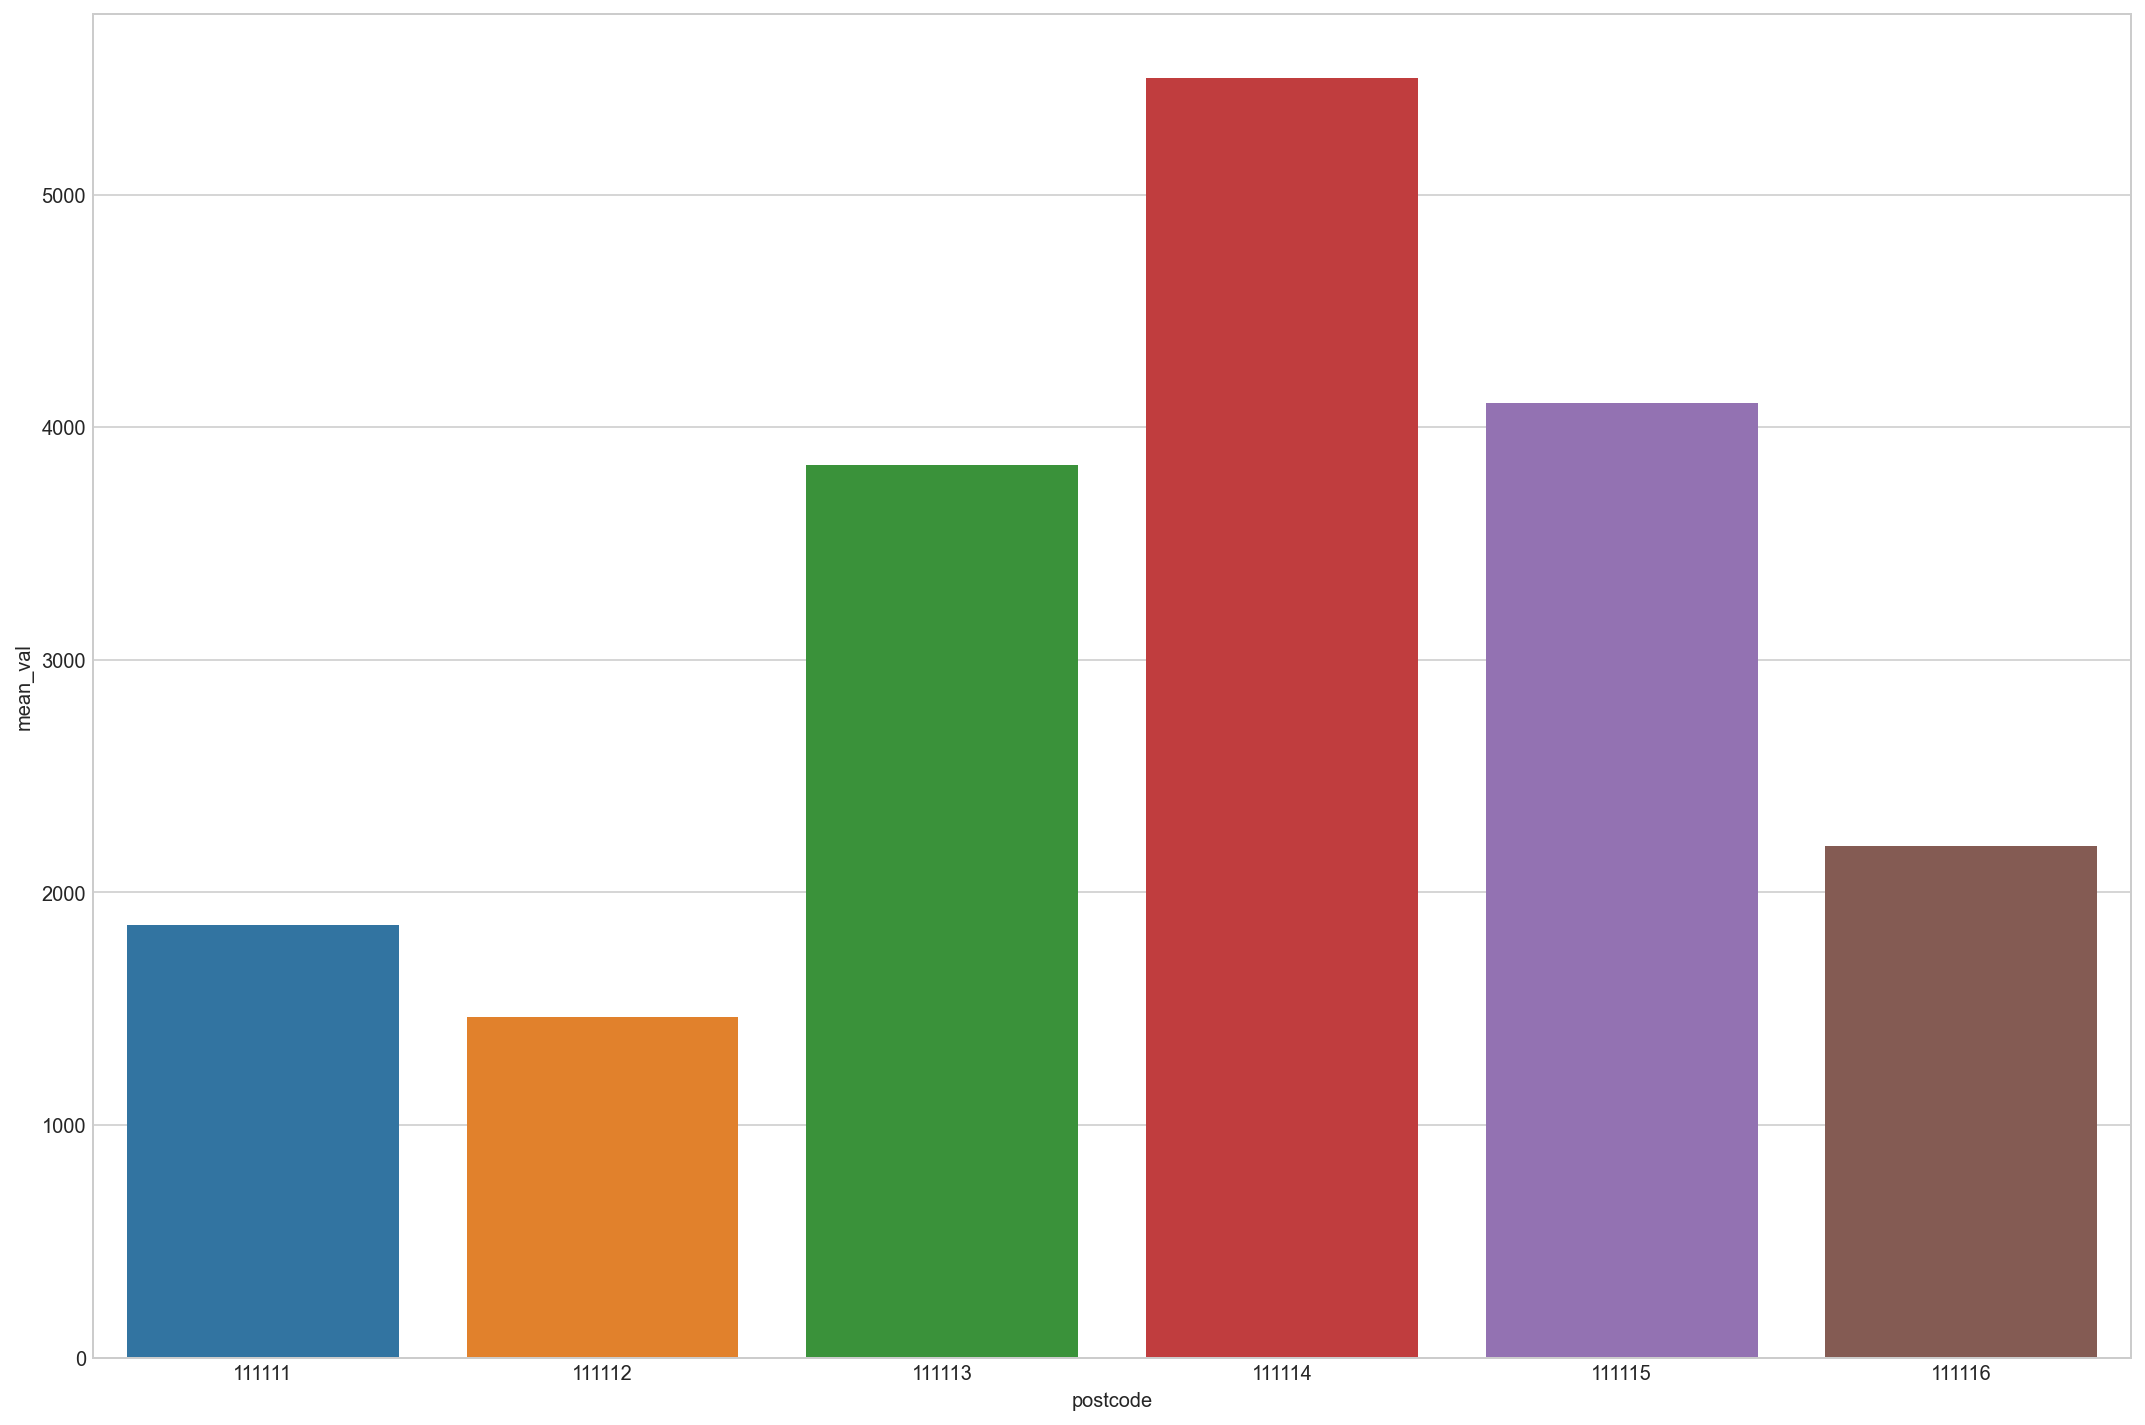

In [86]:
gg = sns.barplot(x='postcode', y='mean_val', data=t)

In [11]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [72]:
t

,postcode,orders_shipped,orders_delivered,value_shipped,value_delivered,mean_val,returns,delivered_percent,avg_return
0,111114,21,12,145570.815800,115564.679400,5503.079971,30006.13640,0.571429,3334.015156
1,111115,204,178,921418.313764,837113.465314,4103.497379,84304.84845,0.872549,3242.494171
2,111113,53,45,316907.841150,203363.674300,3837.050458,113544.16685,0.849057,14193.020856
3,111116,16,7,64936.666900,35216.666900,2201.041681,29720.00000,0.437500,3302.222222
4,111111,117,86,755560.530800,217618.825750,1859.989964,537941.70505,0.735043,17352.958227
5,111112,22,16,75370.851300,32235.129100,1465.233141,43135.72220,0.727273,7189.287033


Text(0.5, 0, 'value_shipped')

<AxesHostAxes:xlabel='postcode', ylabel='avg_return'>

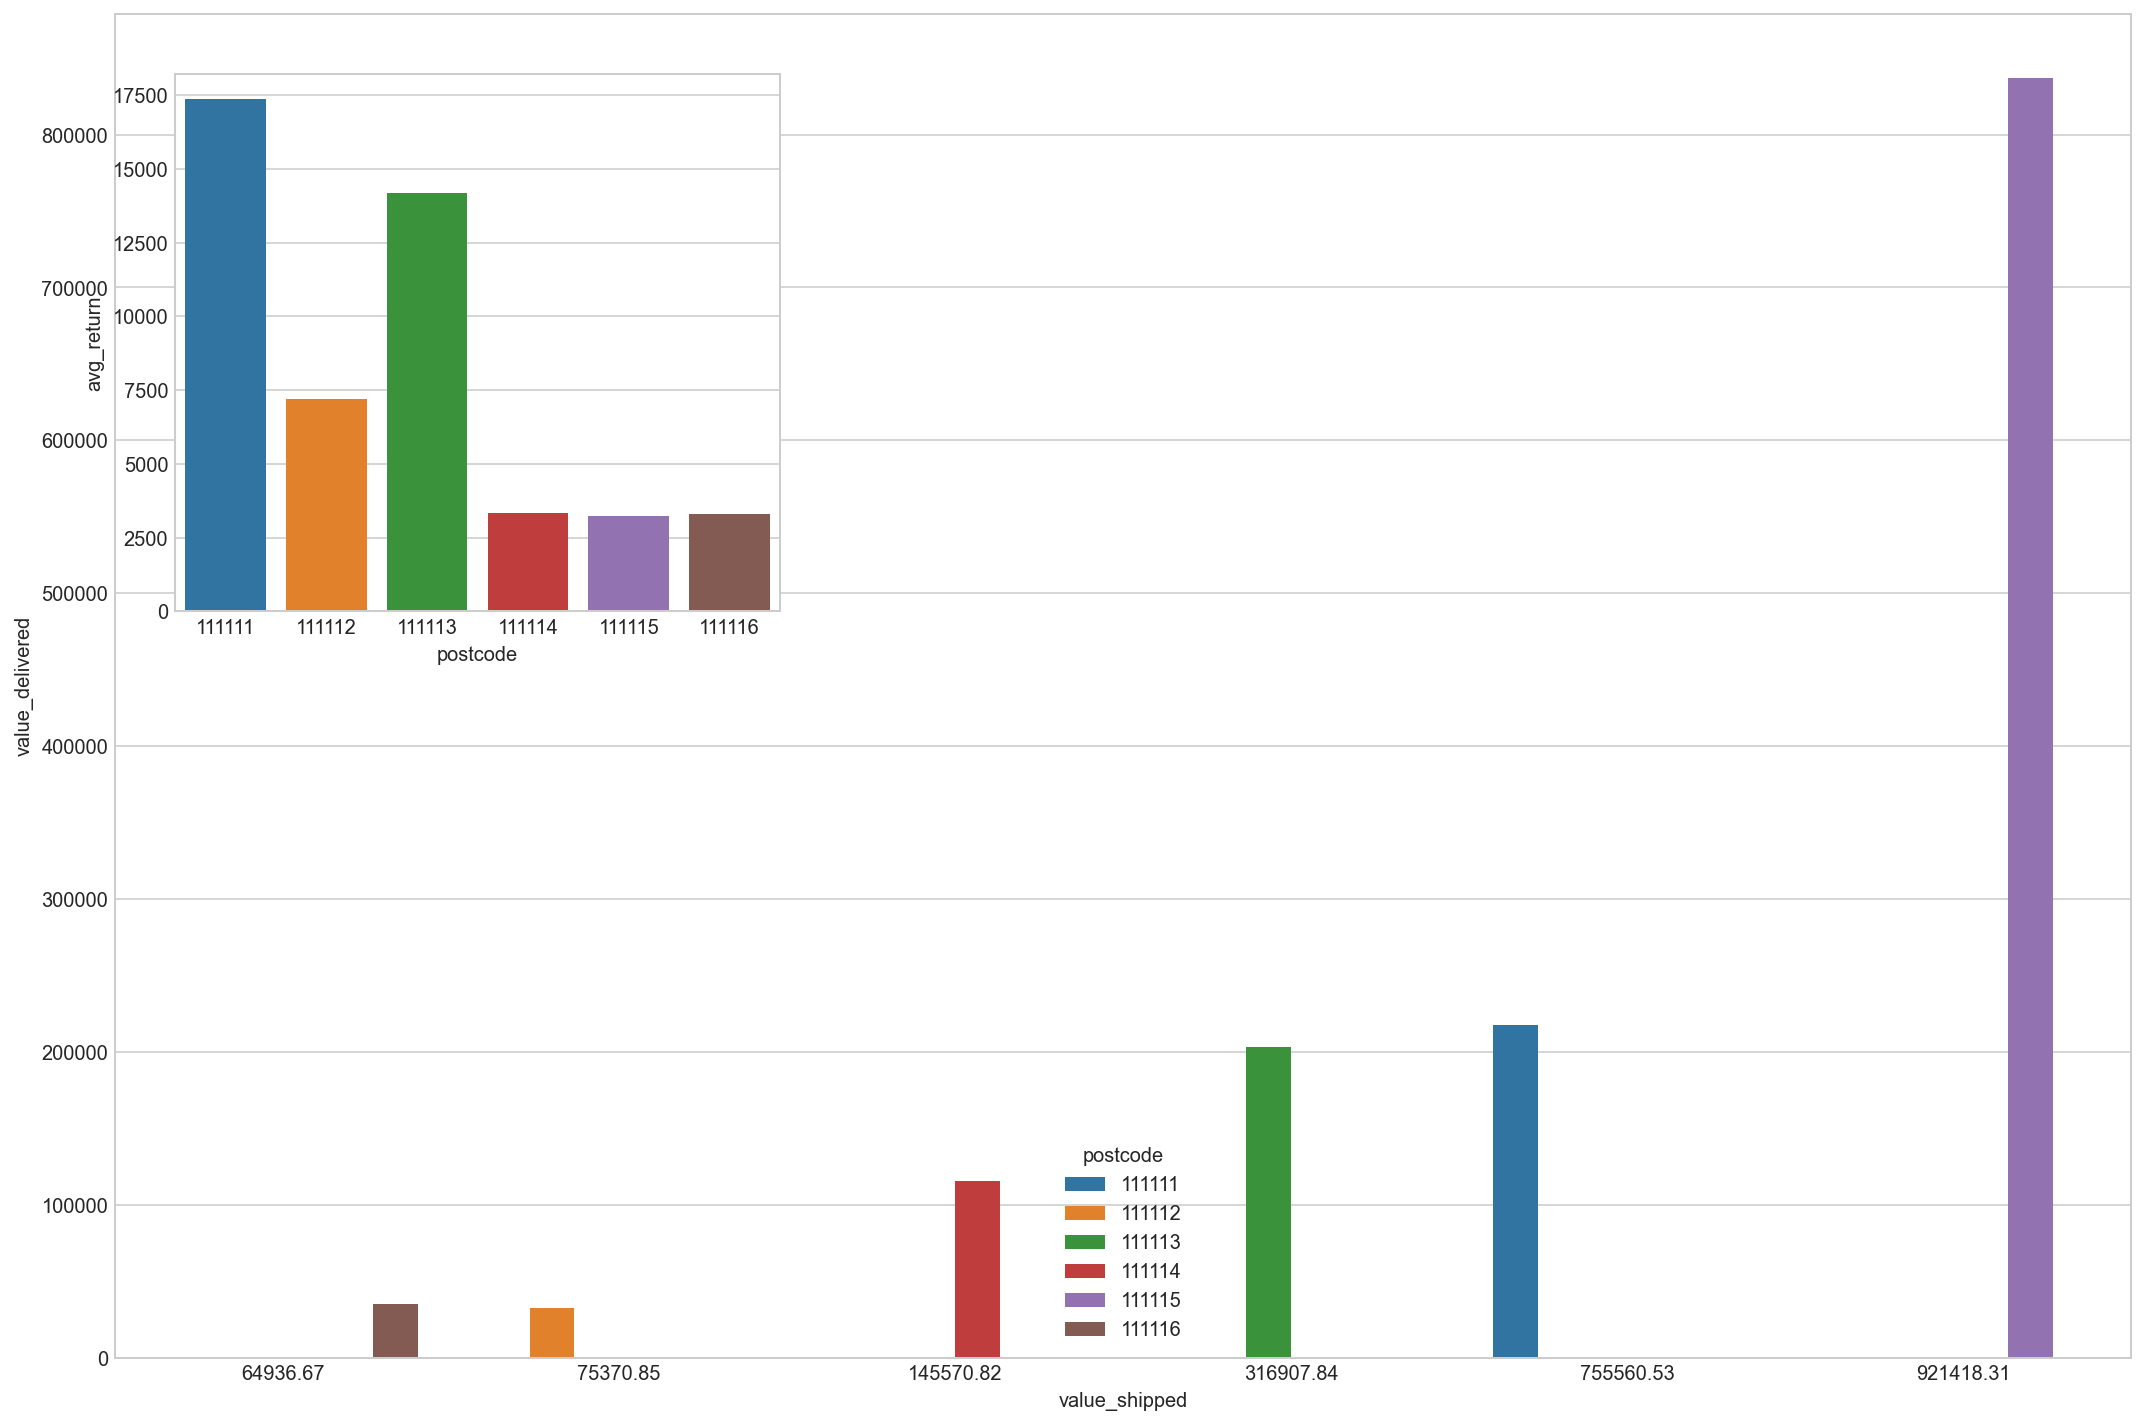

In [79]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots()

# sns.barplot(
#     x='postcode',
#     y='delivered_percent',
#     data=t,
# )
g = sns.barplot(
    x='value_shipped',
    y='value_delivered',
    hue='postcode',
    data=t,
)
# g.set_xticklabels(rotation=45)

ax.xaxis.set_label_text('value_shipped')
# ax.set(yscale="log")

axins = inset_axes(ax, "30%", "40%", loc="upper left", borderpad=3)

sns.barplot(x='postcode', y='avg_return', data=t, ax=axins)

plt.show()

In [91]:
!ls

27-A_demo.txt             README.md                 im.png
27.01.ipynb               RegRU.ipynb               items.png
27.01.py                  YaTest.ipynb              kivork.ipynb
CFT.ipynb                 ab_data.csv               movie_metadata.csv
K_1.png                   cian                      payments.png
Lamoda.ipynb              cian.ipynb                pivot_table
Lamoda_Note.md            dataframe_lamoda.xlsm     query
Pipfile                   df1.csv                   revenue_data.csv
Pipfile.lock              dummy                     transactions by month.csv


In [17]:
t.reset_index()[["postcode", "K_1", "returns"]]


,postcode,K_1,returns
0,111114,9630.389950,30006.13640
1,111116,5030.952414,29720.00000
2,111115,4702.884637,84304.84845
3,111113,4519.192762,113544.16685
4,111111,2530.451462,537941.70505
5,111112,2014.695569,43135.72220


In [15]:
dfi.export(t.reset_index()[["postcode", "K_1"]], "K_1.png")


[0124/010409.183115:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/t0/fw3jvl196_v78v94hzhxhpgw0000gn/T/: Operation not permitted (1)
[0124/010409.186824:ERROR:file_io.cc(94)] ReadExactly: expected 8, observed 0
[0124/010409.190670:ERROR:xattr.cc(63)] setxattr org.chromium.crashpad.database.initialized on file /var/folders/t0/fw3jvl196_v78v94hzhxhpgw0000gn/T/: Operation not permitted (1)
[0124/010410.553690:INFO:headless_shell.cc(653)] Written to file /var/folders/t0/fw3jvl196_v78v94hzhxhpgw0000gn/T/tmpc3zb6vmq/temp.png.
